In [111]:
import pandas as pd
import pickle
import regex as re
from gensim.parsing.preprocessing import stem_text
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.metrics import classification_report, confusion_matrix
sys.path.append('../')
from pathlib import Path


# Select the model and the data we want to test on 

In [112]:
df_prelabeled = pd.read_csv('modeled_data/labeled-clustered_data_kmeans_ger_v2.csv', sep=';')

In [113]:
df_clustered = pd.read_csv('modeled_data/clustered_data_kmeans_ger_v2.csv')

In [114]:
df_prelabeled["predicted_topic"] = df_clustered["topic"]


In [115]:
# remove empty rows 
df_prelabeled.dropna(inplace=True)

In [116]:
df_prelabeled

,data,player,language,publishedAt,Label,predicted_topic
6,gut fehlentscheidung sascha stegemann borussia dortmund meisterschaft kostet entscheidenden moment gab bundesliga histori mehrfach sportschau blickt zuruck,exequiel palacios,de,2023-03-09T20:18:19Z,Bundesliga News,Bundesliga News
14,sonntagspartien fussbal bundesliga spieltag uberblick joshua kimmich nationalmannschaft abwesenheit manuel neuer kommenden woch kapitan anfuhren wird munchner fuhrung gebracht argentini einzig aktuel weltmeist bundesliga dreht spiel zwei foulelfmetern kurio schiedsricht tobia stieler beiden aktionen benjamin pavard dayot upamecano gefoulten adli wegen vermeintlich schwalben zunachst gelb gegeben beid male nahm kart videostudium zuruck beid male entschuldigt adli beid male zeigt verspatung punkt drucker bevor munchner erst chanc hatten gab weiter chancen diabi frimpong uberraschend jeweil ecken torschuss minuten prozent ballbesitz gastgeb dann nicht schlug serienmeist eiskalt leon goretzka legt kimmich schuss odilon kossoun unhaltbar latt abfalscht bereit kimmich vierter saisontreff mehr lediglich saison sech,exequiel palacios,de,2023-03-19T18:35:00Z,Bundesliga News,Bundesliga News
24,borussia dortmund sagt schiri boss gluck entscheidung all schelt video assistenten immer langst immer recht einstecken mussen bot sonntaglich spiel bayern munchen deutlichen kuriosen kontrast zweimal nahm schiedsricht tobia stieler schwalb adli strafraum bayern wahr verwarnt deshalb jeweil beid male interveniert var soren stork jedoch vollig recht adli klar gefoult worden war stieler nahm folgerichtig beiden fallen gelb kart zuruck bat adli per handschlag entschuldigung sprach leverkusenern strafstoss sicher verwandelt,exequiel palacios,de,2023-03-20T05:39:04Z,Bundesliga News,Bundesliga News
42,alonso weiss final kommt gewinnt fruher welt europameist trainer schaffen einzug halbfinal klappen donnerstag hofft nationalspiel einsatz argentinischen weltmeist hinspiel oberschenkelproblemen ausgewechselt wurd mittwoch erstmal trainiert wir mussen sehen darauf reagiert deshalb fallt entscheidung donnerstag sagt rolf aber ware wichtig spielen letzten wochen dominant roll eingenommen,exequiel palacios,de,2023-04-19T13:04:13Z,Europa League,Game Situations and Match Performance
81,leipzig liegt zwei runden schluss deutschen bundesliga rang drei leipzig fixierten sonntag abschluss rund spat erfolg werder bremen punkt vorsprung vierten union berlin xaver schlager kam minut zweiten einsatz syndesmosebandriss eingewechselt wurd anstel landsmann konrad laimer stade renn ausgeliehen serhou guirassi bracht stuttgart minut per foulelfmet fuhrung argentinisch weltmeist strafstoss verschuldet hatt sorgt ebenfal per foulelfmet minut ausgleich schulter angeschlagen ofb teamtormann patrick pentz stand siebenten kader,exequiel palacios,de,2023-05-14T18:07:21Z,Bundesliga News,Bundesliga News
111,torschutzen sich wirtz jubeln tage wirtz darauf warten schutz schwarmt ich gar sagen seht immer individuel klass grossartig team viel einfach glucklich flo haben,jeremie frimpong,de,2023-04-02T12:05:20Z,Game Situations and Match Performance,Game Situations and Match Performance
155,gegner halbfinal europaleagu sich roma zeigt rotterdam mannschaft lage xaist einzig deutscher klub uberhaupt europapok dabei halbfinal der xaeuropa leagu bundesliga klub besiegt donnerstagabend belgischen vertret union saint gillois hinspiel ausgegangen trafen diabi minut michel bakker adam hlozek einzig tor belgier sorgt casper terho dpa,jeremie frimpong,de,2023-04-21T09:05:10Z,Europa League,Europa League
160,torschutz amiri recht jubeln treffer,jeremie frimpong,de,2023-04-23T17:33:57Z,Game Situations and Match Performance,Game Situations and Match Performance
211,gereizt bayern spannendsten titelkampf seit jahren meisterlich zuruckgeschlagen munchner dauer champion konterten angriff borussia dortmund bundesliga thron topspiel union berlin machtigen offens spielfreud kront fussbal starensembl trainer julian nagelsmann

In [117]:

# Assuming your DataFrame is named df_prelabeled
actual_labels = df_prelabeled['Label']
predicted_labels = df_prelabeled['predicted_topic']

# Generate classification report
report = classification_report(actual_labels, predicted_labels)

print(report)


                                       precision    recall  f1-score   support

                      Bundesliga News       0.89      0.73      0.80        11
                        Europa League       1.00      0.90      0.95        10
Game Situations and Match Performance       0.69      0.90      0.78        10

                             accuracy                           0.84        31
                            macro avg       0.86      0.84      0.84        31
                         weighted avg       0.86      0.84      0.84        31



In [118]:
# Assuming your DataFrame is named df_prelabeled
actual_labels = df_prelabeled['Label']
predicted_labels = df_prelabeled['predicted_topic']

# Create confusion matrix
confusion_mat = confusion_matrix(actual_labels, predicted_labels)

print(confusion_mat)


[[8 0 3]
 [0 9 1]
 [1 0 9]]


[Text(0, 0.5, 'Bundesliga'),
 Text(0, 1.5, 'Euro-League'),
 Text(0, 2.5, 'Match Performance')]

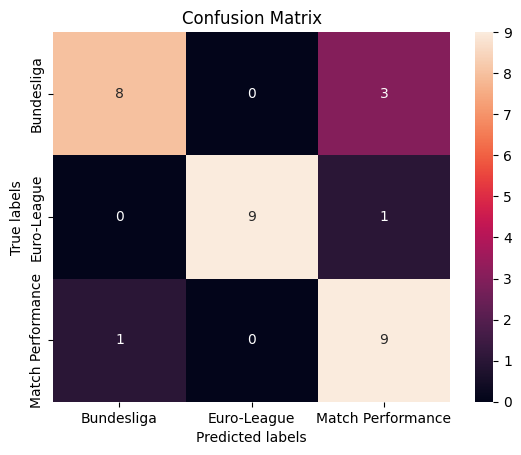

In [119]:
# create a heatmap plot to examine the errors   
ax= plt.subplot()
sns.heatmap(confusion_mat, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Bundesliga', 'Euro-League', 'Match Performance'])
ax.yaxis.set_ticklabels(['Bundesliga', 'Euro-League', 'Match Performance'])

In [120]:
# Set display options to show all rows
pd.set_option('display.max_colwidth', None)

df_prelabeled[ (df_prelabeled["predicted_topic"] == 'Game Situations and Match Performance') & (df_prelabeled["Label"] == "Bundesliga News") ]


,data,player,language,publishedAt,Label,predicted_topic
211,gereizt bayern spannendsten titelkampf seit jahren meisterlich zuruckgeschlagen munchner dauer champion konterten angriff borussia dortmund bundesliga thron topspiel union berlin machtigen offens spielfreud kront fussbal starensembl trainer julian nagelsmann sonntag zuschauern allianz arena tore eric maxim choupo mote minut kingslei coman geburtstagskind jamal musiala xain nachspielzeit halft gesperrten hincapi adli auskommen musst ruckstand knabbern kurz paus kratzten gast ausgleich auffallig diabi schlug ball verzettelt demirbai pruft torhut mark flekken abwesenheit gunter kapitansbind trug gewaltschuss zweiten reih zudem kopft frimpong freistehend kasten,jonathan tah,de,2023-02-26T18:32:00Z,Bundesliga News,Game Situations and Match Performance
391,bayern freiburg pokal au woch zumindest wenig revanchiert vier tage viertelfin gewann deutsch fussbal rekordmeist bundesliga auswartsspiel freiburg verteidigt tabellenfuhrung bestimmten gastgeb parti gewannen verdient tore adli sardar azmoun eintracht reicht zwischenzeitlichen djibril sow,moussa diaby,de,2023-04-08T15:44:21Z,Bundesliga News,Game Situations and Match Performance
550,gladbach personalsorgen heimspiel augsburg julian weigl mittwoch mannschaftstrain auftauchen wurd abzusehen bosen foul schwere prellung linken unterschenkel zog mittelfeldspiel ich gratsch angst stark getroffen gluck ungluck teilnahm saisonfinal bangen,piero hincapie,de,2023-05-24T16:55:51Z,Bundesliga News,Game Situations and Match Performance


The highest error rate is for the True Label Bundesliga News which is predicted as Game Situations and Match Performance three times. The error is explainable by the similiarity of both topics. If we look at specific Bundesliga news rows which are predicted as Game Situations and Match Performance we can clearly see that within the article paragraphs there is also text about how the players acted within games. Therefore parts of the article are in both clusters. 

In [121]:

clusters = df_clustered.groupby(['topic']).size()
clusters

topic
Bundesliga News                          165
Europa League                            171
Game Situations and Match Performance    261
dtype: int64

## Cluster naming
0 = Europa League
___
1 = Bundesliga news
___
2 = Europa League
___
3 = Game Situations and Match Performance
___
4 = Europa League
___
5 = Game Situations and Match Performance
___
6 = Bundesliga News
___
7 = Europa League

# Connect with sentiment

In [122]:
df_sentiment = pd.read_csv('../sentiment_analysis/data/data_sentiment_final.csv')


In [123]:
# select german data and only needed columns
df_sentiment = df_sentiment[df_sentiment["language"] == "de"]
df_sentiment = df_sentiment.loc[:, ['publishedAt', 'player', 'sentiment']]



In [124]:
# keep only last name
df_clustered['player'] = df_clustered['player'].str.lstrip().str.split(n=1).str[-1]


In [125]:
# Merge the two dataframes on the pubishedAt
merged_df = pd.merge(df_clustered, df_sentiment, on=['publishedAt', 'player'], how='left')

In [126]:
print('size of the previous clustered Dataframe : ', str(len(df_clustered)), '\n',
      'size of the merged Dataframe : ', str(len(merged_df)))

size of the previous clustered Dataframe :  597 
 size of the merged Dataframe :  597


We see that 4 more rows were created. To check further we look into the duplicates in publishing date and player

In [127]:
# print out duplicates in the publishing date 
merged_df[merged_df.duplicated(subset=['publishedAt', 'player'], keep=False)]


,data,player,language,publishedAt,cluster,topic,sentiment
459,inmitten tausend gluckselig fan bochum stadion konnten trainer thoma letsch helden kaum umarmungen retten klassenerhalt vfl bochum fussbal bundesliga europacup aspiranten sorgt ruhrgebietsstadt gross emotionen,diaby,de,2023-05-27T16:03:12Z,1,Bundesliga News,NaN
460,inmitten tausend gluckselig fan bochum stadion konnten trainer thoma letsch helden kaum umarmungen retten klassenerhalt vfl bochum fussbal bundesliga europacup aspiranten sorgt ruhrgebietsstadt gross emotionen wa mannschaft verein stadt ausgezeichnet immer aufgestanden dran geglaubt spieltag heimspiel voll hutt sagt thoma letsch klein ewigkeit nachdem trubel entronnen war,diaby,de,2023-05-27T16:03:12Z,1,Bundesliga News,NaN
547,inmitten tausend gluckselig fan bochum stadion konnten trainer thoma letsch helden kaum umarmungen retten klassenerhalt vfl bochum fussbal bundesliga europacup aspiranten sorgt ruhrgebietsstadt gross emotionen,hincapie,de,2023-05-27T16:03:12Z,1,Bundesliga News,NaN
548,inmitten tausend gluckselig fan bochum stadion konnten trainer thoma letsch helden kaum umarmungen retten klassenerhalt vfl bochum fussbal bundesliga europacup aspiranten sorgt ruhrgebietsstadt gross emotionen wa mannschaft verein stadt ausgezeichnet immer aufgestanden dran geglaubt spieltag heimspiel voll hutt sagt thoma letsch klein ewigkeit nachdem trubel entronnen war,hincapie,de,2023-05-27T16:03:12Z,1,Bundesliga News,NaN


We can conclude that 4 rows were doubled withing the merging stage. These rows will be deleted in the following steps.

In [128]:
# Assuming df is your DataFrame
merged_df = merged_df.drop([460, 462, 550, 552])


In [129]:
# loading the merged df into a csv in order to load into hex 
merged_df.to_csv('modeled_data/clustered_data_kmeans_plus_sentiment_ger.csv', index=False)
